In [48]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, explained_variance_score
from sklearn.feature_selection import VarianceThreshold, f_regression, SelectKBest, RFE
import matplotlib.pyplot as plt
%matplotlib inline

In [49]:
boston = datasets.load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['price'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Variance Threshold
$$Var(X) = E[(X - \mu)^2]$$

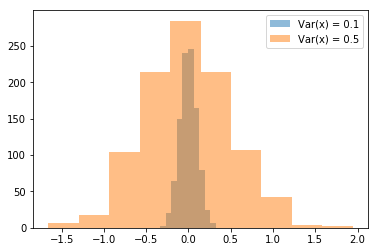

In [50]:
x1 = np.random.normal(0, 0.1, 1000)
x2 = np.random.normal(0, 0.5, 1000)
plt.hist(x1, alpha=0.5, label='Var(x) = 0.1')
_ = plt.hist(x2, alpha=0.5, label='Var(x) = 0.5')
plt.legend()

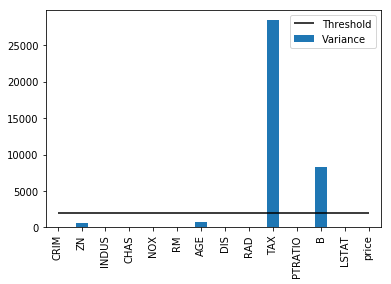

In [51]:
ax = df.var(0).plot(kind='bar', label='Variance')
ax.hlines(2000, 0, 13, label='Threshold')
plt.legend()

In [52]:
vt = VarianceThreshold(threshold=2000)
x_reduced = vt.fit_transform(df)
df.columns[vt.get_support()]

Index(['TAX', 'B'], dtype='object')

In [53]:
x_reduced

array([[296.  , 396.9 ],
       [242.  , 396.9 ],
       [242.  , 392.83],
       ...,
       [273.  , 396.9 ],
       [273.  , 393.45],
       [273.  , 396.9 ]])

In [54]:
df.var(0)

CRIM          73.986578
ZN           543.936814
INDUS         47.064442
CHAS           0.064513
NOX            0.013428
RM             0.493671
AGE          792.358399
DIS            4.434015
RAD           75.816366
TAX        28404.759488
PTRATIO        4.686989
B           8334.752263
LSTAT         50.994760
price         84.586724
dtype: float64

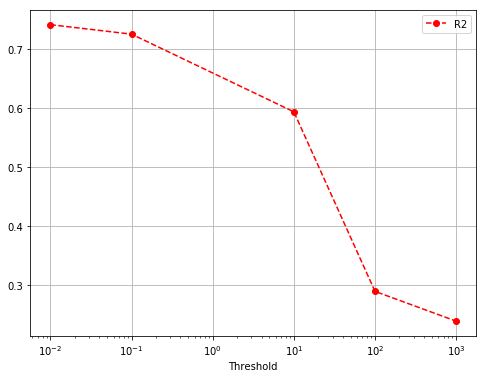

In [55]:
X = boston.data
y = boston.target

thresholds = [0.01, 0.1, 10, 100, 1000]
r2 = []
n_cols = []

for t in thresholds:
    vt = VarianceThreshold(threshold=t)
    x_red = vt.fit_transform(X)
    n_cols.append(x_red.shape[1])
    lr = LinearRegression().fit(x_red, y)
    p = lr.predict(x_red)
    r2.append(r2_score(y, p))

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(thresholds, r2, 'ro--', label='R2')
ax.grid()
ax.set_xscale('log')
ax.set_xlabel('Threshold')
_ = ax.legend()

## Selecting the $k$ best features

In [36]:
X = boston.data
y = boston.target

k = 3
selector = SelectKBest(f_regression, k=k)
x_red = selector.fit_transform(X, y)
x_red.shape

(506, 3)

In [37]:
lr.fit(x_red, y)
lr.score(x_red, y)

0.6786241601613112

In [38]:
K = list(range(1, X.shape[1] + 1))
K

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]

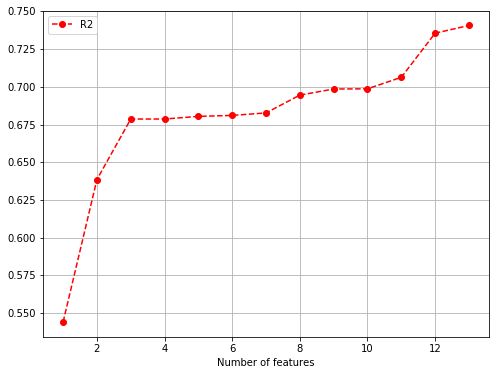

In [39]:
r2 = []

for k in K:
    selector = SelectKBest(f_regression, k=k)
    x_red = selector.fit_transform(X, y)
    lr = LinearRegression().fit(x_red, y)
    r2.append(lr.score(x_red, y))

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(K, r2, 'ro--', label='R2')
ax.grid()
ax.set_xlabel('Number of features')
_ = ax.legend()

### Exercise: Find how many "best" features are optimal for the Diabetes dataset

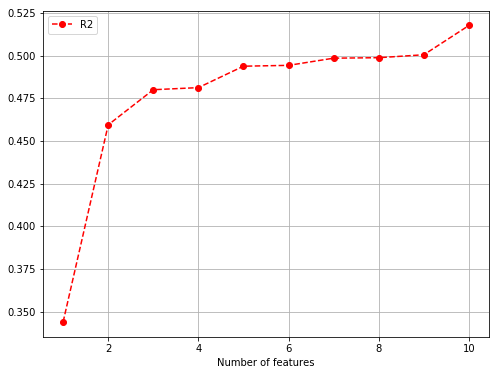

In [28]:
diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
K = list(range(1, X.shape[1] + 1))

r2 = []

for k in K:
    selector = SelectKBest(f_regression, k=k)
    x_red = selector.fit_transform(X, y)
    lr = LinearRegression().fit(x_red, y)
    r2.append(lr.score(x_red, y))

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(K, r2, 'ro--', label='R2')
ax.grid()
ax.set_xlabel('Number of features')
_ = ax.legend()

## Recursive Feature Elimination

In [41]:
columns = df.drop(['price'], axis=1).columns

lr = LinearRegression()
rfe = RFE(lr, step=1, verbose=1)
x_red = rfe.fit_transform(X, y)

lr.fit(x_red, y)
print(lr.score(x_red, y))

Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
0.7157742117396082


In [42]:
# Which columns are kept?
columns[rfe.get_support()]

Index(['CHAS', 'NOX', 'RM', 'DIS', 'PTRATIO', 'LSTAT'], dtype='object')

In [43]:
rfe = RFE(lr, n_features_to_select=3, step=1, verbose=1)
x_red = rfe.fit_transform(X, y)

lr.fit(x_red, y)
print(lr.score(x_red, y))

Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
0.5555737130590868


## Exercise: Find the R2 score with the 3 best columns in the diabetes dataset.
### Which are these three columns?

In [45]:
X = diabetes.data
y = diabetes.target

lr = LinearRegression()
rfe = RFE(lr, n_features_to_select=3, step=1, verbose=1)
x_red = rfe.fit_transform(X, y)

lr.fit(x_red, y)
lr.score(x_red, y)

Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.


0.47002448720669265

In [47]:
pd.Series(diabetes.feature_names).values[rfe.get_support()]

array(['bmi', 's1', 's5'], dtype=object)